In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from cycler import cycle

%matplotlib inline

In [2]:
disp214 = np.load('214_dispersion.npz')
disp327 = disp214

In [3]:
def set_minors(ax, xtickvals):
    ax.xaxis.set_minor_locator((ticker.FixedLocator((xtickvals[:-1] + xtickvals[1:])/2)))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
    


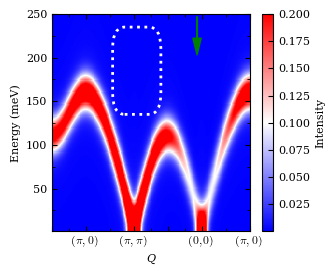

In [4]:
fig, ax = plt.subplots(figsize=(3+3/8, 2.8))

art = ax.pcolorfast(disp214['x_axis'], disp214['omega_eval'], disp214['I_smooth'], cmap='bwr',
                    vmax=.2)
cb = plt.colorbar(art, ax=ax)
cb.set_label('Intensity')
ax.set_xlabel('$Q$')
ax.set_ylabel('Energy (meV)')
_ = ax.set_xticks(disp214['ticks'])
_ = ax.set_xticklabels(disp214['label_list'], fontsize=8, usetex=True) # try not to change fontsizes, but making an exception seems unavoidable here
set_minors(ax, disp327['ticks'])

    
# add box
box = mpl.patches.FancyBboxPatch((150, 160), 50, 50, boxstyle='Round, pad=25', edgecolor='w', fill=False, linestyle=':', linewidth=2)
ax.add_patch(box)

style = "Simple, tail_width=0.5, head_width=6, head_length=12"
arrow = mpl.patches.FancyArrowPatch((300, 250), (300, 200),
                             connectionstyle="arc3,rad=.0", arrowstyle=style, color='green')


ax.add_patch(arrow)
fig.tight_layout()
fig.savefig('ex_18_SWT_highlights.pdf', dpi=1200)